## 1. Introduction.

### i. 5 examples of the application of ML methods in life


Спам-фильтр в электронной почте --- экономия времени и повышение безопасности. <br>
Рекомендательные системы --- пользователи тратят меньше времени на поиск контента и открывают для себя новые интересные фильмы или вещи.<br>
Распознавание лиц в фото --- достаточно один раз указать, кто есть кто, и система сама соберет все фото с этим человеком в один альбом или найдет их по поиску.<br>
Голосовые помощники --- обеспечивает естественный и безопасный способ взаимодействия с техникой (например за рулем).<br>
Диагностика в медицине --- повышение точности диагностики и снижение риска врачебной ошибки.<br>

### ii. Which class you can assign to the tasks from the table above and to the 5 examples you provided

1 - регрессия, 2 - классификация, 3 - регрессия, 4 - классификация , 5 - кластеризация, 6 - классификация , 7 - обучение с подкреплением, 8 - ранжирование , 9 - кластеризация , 10 - обнаружение аномалий. <br>
1 - бинарная классификация, 2 - ранжирование, 3 - классификация, 4 - классификация, 5 - бинарная классификация.

### iii. Think about what the difference is between multiclass and multilabel


Мультикласс - это когда у объекта может быть только одна метка из всех возможных, а мультилейбл - несколько меток одновременно.

### iv. Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?


Это классика регрессии так как мы предсказываем цену. Можно сделать и классификацию, если категоризовать, например категории эконом (до 3к), комфорт (от 3к до 8к) и бизнес (8к+).

## 2. Introduction to Data Analysis

### i. Import

In [576]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

### ii. Load data

In [577]:
data = "data/train.json"
df = pd.read_json(data)
df['interest_level'] = df['interest_level'].astype('object')

df2 = pd.read_json("data/test.json")

In [578]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### iii. Size of data

In [579]:
df.shape

(49352, 15)

### iv. List of columns

In [580]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='str')

### v. Quick analysis

In [581]:
df.info()

<class 'pandas.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  str    
 3   created          49352 non-null  str    
 4   description      49352 non-null  str    
 5   display_address  49352 non-null  str    
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  str    
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  str    
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(3), str(6)
memory usage: 6.0+ MB


In [582]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00,49352.00,49352.00,49352.00,49352.00,49352.00
mean,1.21,1.54,40.74,7024054.66,-73.96,3830.17
std,0.50,1.12,0.64,126274.61,1.18,22066.87
min,0.00,0.00,0.00,6811957.00,-118.27,43.00
25%,1.00,1.00,40.73,6915887.50,-73.99,2500.00
50%,1.00,1.00,40.75,7021070.50,-73.98,3150.00
75%,1.00,2.00,40.77,7128733.25,-73.95,4100.00
max,10.00,8.00,44.88,7753784.00,0.00,4490000.00


In [583]:
df.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.00,0.53,-0.01,0.00,0.01,0.07
bedrooms,0.53,1.00,-0.00,0.01,0.01,0.05
latitude,-0.01,-0.00,1.00,0.00,-0.97,-0.00
listing_id,0.00,0.01,0.00,1.00,-0.00,0.01
longitude,0.01,0.01,-0.97,-0.00,1.00,-0.00
price,0.07,0.05,-0.00,0.01,-0.00,1.00


In [584]:
df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

### vi. Features: bathrooms, bedrooms, interest_level ; Target: price

In [585]:
df = df[['price', 'bathrooms', 'bedrooms', 'interest_level']]

## 3. Statistical Data Analysis

### iii. Target analysis

#### a. Histogram

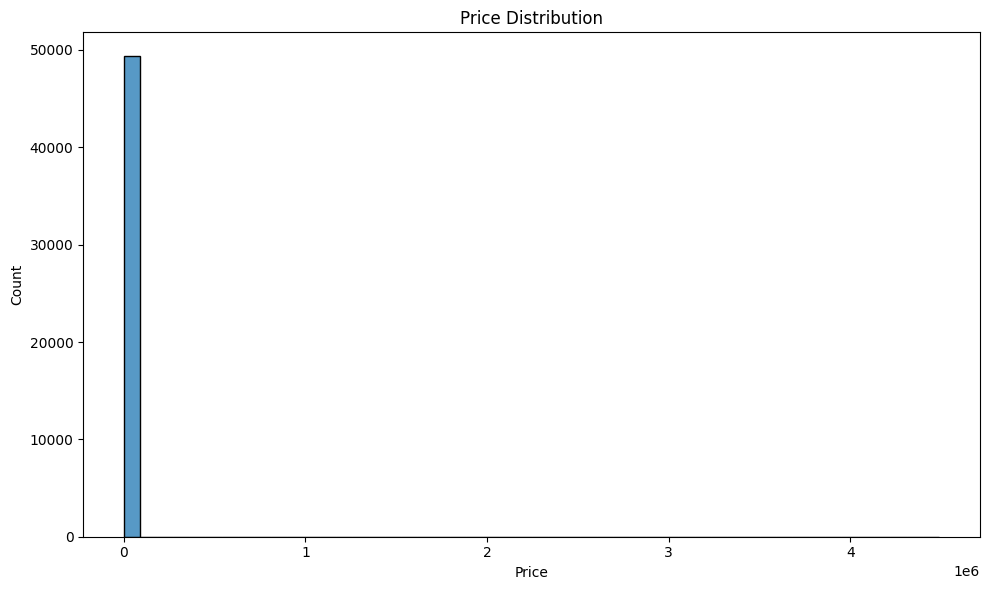

In [586]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df["price"],
    bins=50,
)

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### b. Boxplot

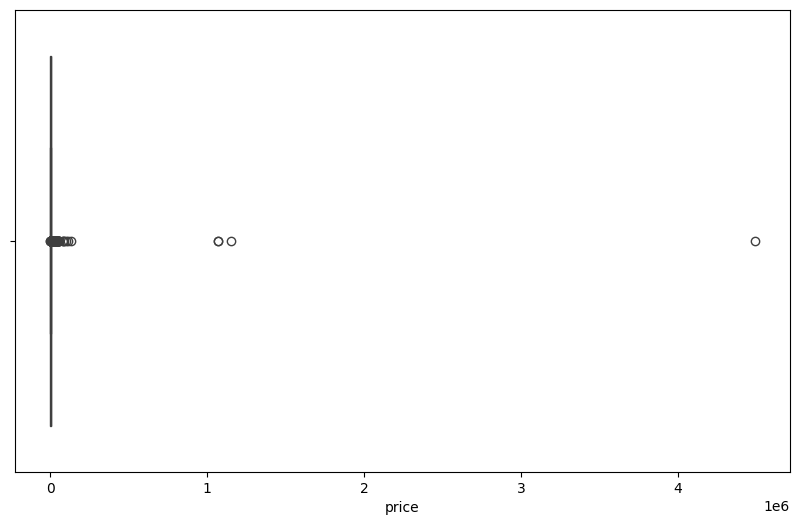

In [587]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df["price"])
plt.show()

#### c. Drop the rows

In [588]:
lower = df["price"].quantile(0.01)
upper = df["price"].quantile(0.99)

df_clean = df[(df["price"] >= lower) & (df["price"] <= upper)]
print(
    f"Original: {len(df["price"])} --- Filtered: {len(df_clean)} --- Filtered: {len(df["price"]) - len(df_clean)} ({(len(df["price"]) - len(df_clean)) / len(df["price"]) * 100:.1f}%)")

Original: 49352 --- Filtered: 48379 --- Filtered: 973 (2.0%)


#### d. Another histogram

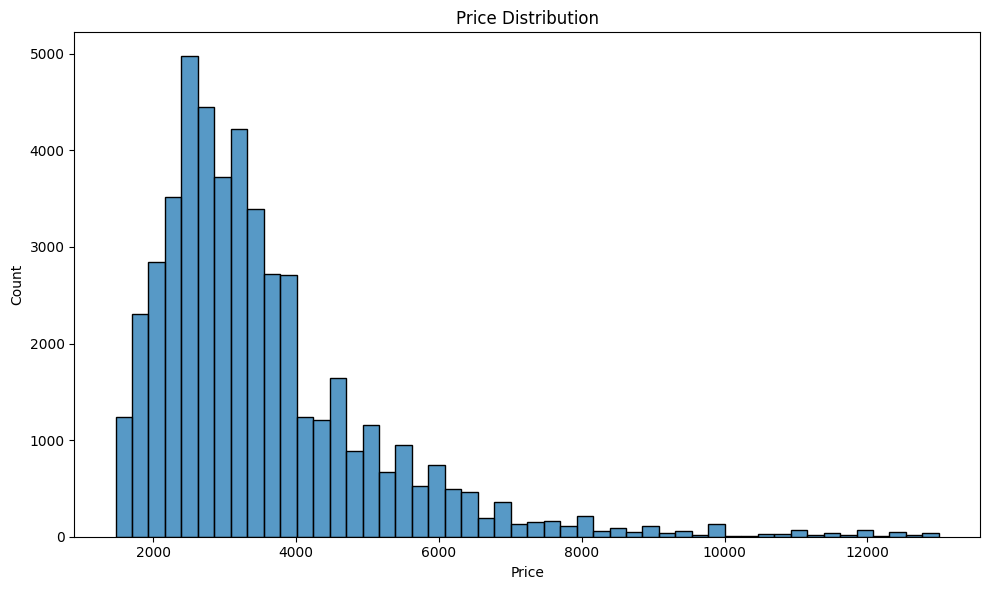

In [589]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_clean["price"],
    bins=50,
)

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Основная масса данных была сконцентрирована в низком-среднем диапазоне цены. После дропа 1%-99% крайне низкие и высокие значения были удалены, что позволило распределить данные более равномерно.

### IV Characteristics Analysis

#### a. Type of column 'interest_level'

In [590]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 48379 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           48379 non-null  int64  
 1   bathrooms       48379 non-null  float64
 2   bedrooms        48379 non-null  int64  
 3   interest_level  48379 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


#### b. Entries of column 'interest_level'

In [591]:
df_clean['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

#### c. Encode values

In [592]:
df_clean['interest_level'] = df_clean['interest_level'].map({
    'low': 0, 'medium': 1, 'high': 2
})

#### d. Histograms for the features 'bathrooms', 'bedrooms'

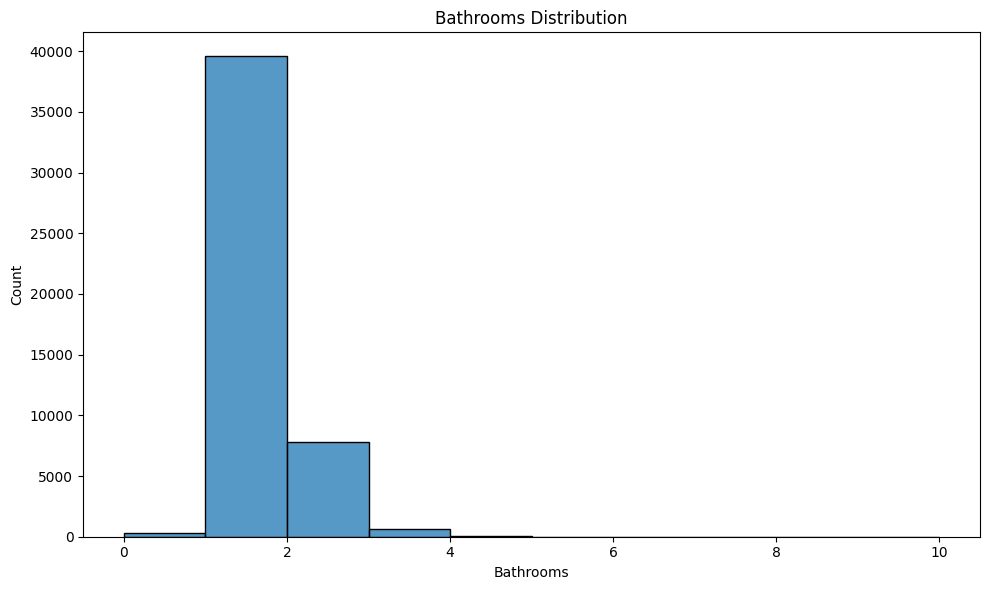

In [593]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_clean["bathrooms"],
    bins=10,
)

plt.title("Bathrooms Distribution")
plt.xlabel("Bathrooms")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


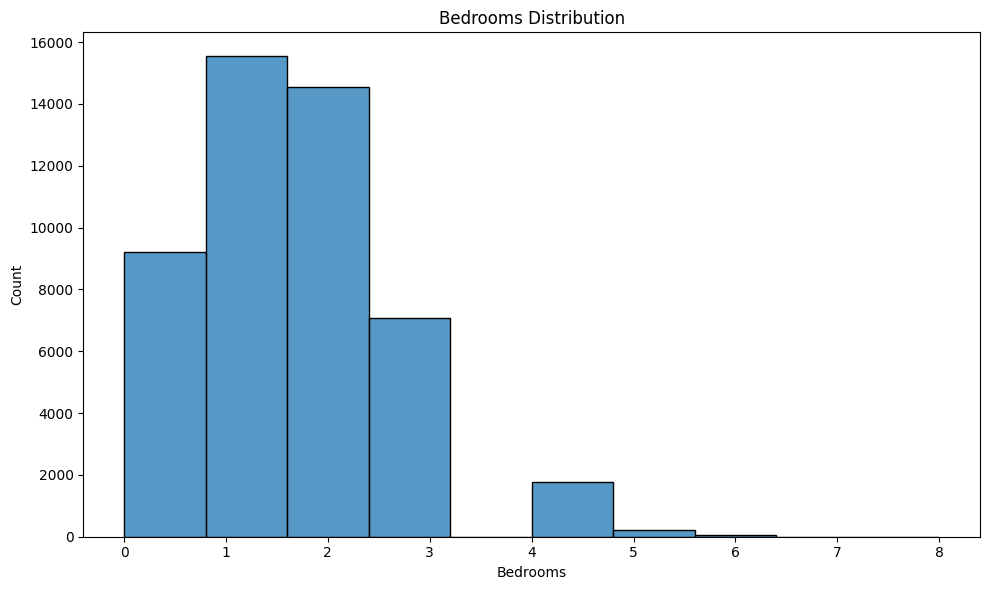

In [594]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_clean["bedrooms"],
    bins=10,
)

plt.title("Bedrooms Distribution")
plt.xlabel("Bedrooms")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### v. Complex analysis

#### a. Correlation matrix and heat map

In [595]:
df_clean[['price', 'bathrooms', 'bedrooms', 'interest_level']].corr()

,price,bathrooms,bedrooms,interest_level
price,1.00,0.67,0.55,-0.20
bathrooms,0.67,1.00,0.52,-0.06
bedrooms,0.55,0.52,1.00,0.05
interest_level,-0.20,-0.06,0.05,1.00


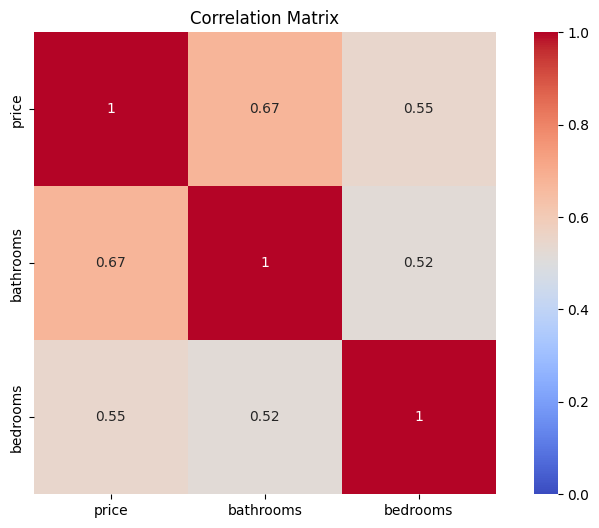

In [596]:
plt.figure(figsize=(10, 6))

sns.heatmap(df_clean[['price', 'bathrooms', 'bedrooms']].corr()
            , annot=True
            , cmap="coolwarm"
            , square=True
            , vmin=0
            , vmax=1)

plt.title("Correlation Matrix")
plt.show()

#### b. Correlation between the features and the target

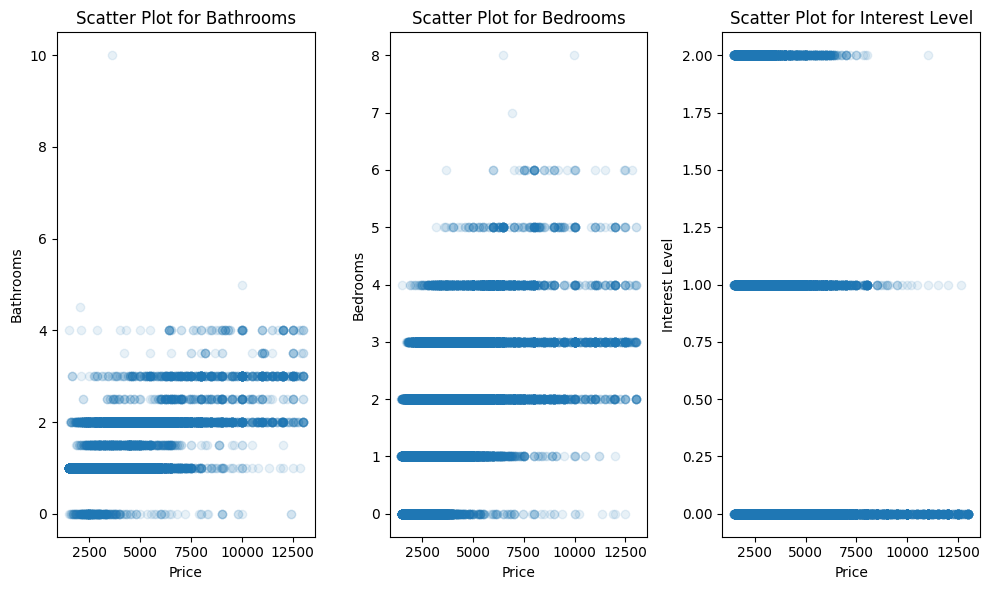

In [597]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

axes[0].scatter(df_clean["price"]
                , df_clean["bathrooms"]
                , alpha=0.1)
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Bathrooms")
axes[0].set_title("Scatter Plot for Bathrooms")

axes[1].scatter(df_clean["price"]
                , df_clean["bedrooms"]
                , alpha=0.1)
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Bedrooms")
axes[1].set_title("Scatter Plot for Bedrooms")

axes[2].scatter(df_clean["price"]
                , df_clean["interest_level"]
                , alpha=0.1)
axes[2].set_xlabel("Price")
axes[2].set_ylabel("Interest Level")
axes[2].set_title("Scatter Plot for Interest Level")

plt.tight_layout()
plt.show()

## 4. Creating Features

### i. Add new features

In [598]:
df_clean['bathrooms_squared'] = df_clean['bathrooms'] ** 2
df_clean['bedrooms_squared'] = df_clean['bedrooms'] ** 2
df_clean['interest_level_squared'] = df_clean['interest_level'] ** 2

In [599]:
df_clean.corr()

,price,bathrooms,bedrooms,interest_level,bathrooms_squared,bedrooms_squared,interest_level_squared
price,1.00,0.67,0.55,-0.20,0.65,0.54,-0.18
bathrooms,0.67,1.00,0.52,-0.06,0.96,0.55,-0.06
bedrooms,0.55,0.52,1.00,0.05,0.48,0.93,0.04
interest_level,-0.20,-0.06,0.05,1.00,-0.07,0.05,0.94
bathrooms_squared,0.65,0.96,0.48,-0.07,1.00,0.52,-0.06
bedrooms_squared,0.54,0.55,0.93,0.05,0.52,1.00,0.04
interest_level_squared,-0.18,-0.06,0.04,0.94,-0.06,0.04,1.00


In [600]:
df_clean = df_clean.drop(columns=['bathrooms_squared', 'bedrooms_squared', 'interest_level_squared'])

Are the new features more correlated with the target than the basic features? **_No_**


### iv. Polynomial Features

### iv. Read the training and test data

In [601]:
X_train = df_clean[['bathrooms', 'bedrooms']]
X_test = df2[['bathrooms', 'bedrooms']]

y_train = df_clean[['price']]
y_test = df2[['price']]

### v. Initialize Polynomial Features

In [602]:
poly = PolynomialFeatures(degree=10)

### vi. Fit and transform

In [603]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("-" * 50)
print(f"Original train shape:   {X_train.shape}")
print("-" * 50)
print(f"Original test shape:   {X_test.shape}")
print("-" * 50)
print(f"Polynomial train shape: {X_train_poly.shape}")
print("-" * 50)
print(f"Polynomial test shape: {X_test_poly.shape}")
print("-" * 50)

--------------------------------------------------
Original train shape:   (48379, 2)
--------------------------------------------------
Original test shape:   (74659, 2)
--------------------------------------------------
Polynomial train shape: (48379, 66)
--------------------------------------------------
Polynomial test shape: (74659, 66)
--------------------------------------------------


## 5. Train models

### i. Results table

In [604]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

### ii. Linear Regression

In [605]:
model = LinearRegression()
model.fit(X_train, y_train)

X_train['prediction'] = model.predict(X_train)
X_test['prediction'] = model.predict(X_test)

mae_train = mean_absolute_error(y_train, X_train['prediction'])
mae_test = mean_absolute_error(y_test, X_test['prediction'])

rmse_train = np.sqrt(mean_squared_error(y_train, X_train['prediction']))
rmse_test = np.sqrt(mean_squared_error(y_test, X_test['prediction']))

result_MAE.loc[len(result_MAE)] = ['linreg', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['linreg', rmse_train, rmse_test]

### iii. Decision Tree

In [606]:
dt_model = DecisionTreeRegressor(random_state=21)

dt_model.fit(X_train, y_train)

X_train['prediction_dt'] = dt_model.predict(X_train)
X_test['prediction_dt'] = dt_model.predict(X_test)

mae_train_dt = mean_absolute_error(y_train, X_train['prediction_dt'])
mae_test_dt = mean_absolute_error(y_test, X_test['prediction_dt'])

rmse_train_dt = np.sqrt(mean_squared_error(y_train, X_train['prediction_dt']))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, X_test['prediction_dt']))

result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_train_dt, mae_test_dt]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_train_dt, rmse_test_dt]

### iv. Naive Models

In [607]:
mean = y_train.mean()
median = y_train.median()

y_pred_train_mean = np.full(len(y_train), mean)
y_pred_test_mean = np.full(len(y_test), mean)

y_pred_train_median = np.full(len(y_train), median)
y_pred_test_median = np.full(len(y_test), median)

mae_train_mean = mean_absolute_error(y_train, y_pred_train_mean)
mae_test_mean = mean_absolute_error(y_test, y_pred_test_mean)

mae_train_median = mean_absolute_error(y_train, y_pred_train_median)
mae_test_median = mean_absolute_error(y_test, y_pred_test_median)

rmse_train_mean = np.sqrt(mean_squared_error(y_train, y_pred_train_mean))
rmse_test_mean = np.sqrt(mean_squared_error(y_test, y_pred_test_mean))

rmse_train_median = np.sqrt(mean_squared_error(y_train, y_pred_train_median))
rmse_test_median = np.sqrt(mean_squared_error(y_test, y_pred_test_median))

result_MAE.loc[len(result_MAE)] = ['naive_mean', mae_train_mean, mae_test_mean]
result_MAE.loc[len(result_MAE)] = ['naive_median', mae_train_median, mae_test_median]

result_RMSE.loc[len(result_RMSE)] = ['naive_mean', rmse_train_mean, rmse_test_mean]
result_RMSE.loc[len(result_RMSE)] = ['naive_median', rmse_train_median, rmse_test_median]

### v. Compare the results

In [608]:
result_MAE

,model,train,test
0,linreg,784.56,986.05
1,decision_tree,756.04,960.23
2,naive_mean,1139.19,1374.70
3,naive_median,1086.21,1322.64


In [609]:
result_RMSE

,model,train,test
0,linreg,1123.88,9625.05
1,decision_tree,1077.48,9602.70
2,naive_mean,1597.65,9715.31
3,naive_median,1644.24,9731.48
